In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_March23.csv


# US ACCIDENTS EXPLORATORY DATA ANALYSIS
Things to include: EDA, dataset info (source, what it contains, how it will be useful)
- Dataset is from Kaggle, contains information about car accidents
- Can be used to analyze, predict and put preventative measures in place against further accidents occurring in the future
- Does not contain data for the state of Alaska, AK

In [2]:
!pip install jovian --upgrade --quiet
import jovian

# Data Prep + Cleaning
1. Load the file using Pandas
2. Look at some info about the data and its columns
3. Fix any missing or incorrect values

In [1]:
# import numpy as np 
import pandas as pd
df = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')

### Data Prep
- Examines columns, rows and data organization

In [8]:
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [23]:
# print(df.columns)
# print(len(df.columns))
df.info

<bound method DataFrame.info of                 ID   Source  Severity           Start_Time  \
0              A-1  Source2         3  2016-02-08 05:46:00   
1              A-2  Source2         2  2016-02-08 06:07:59   
2              A-3  Source2         2  2016-02-08 06:49:27   
3              A-4  Source2         3  2016-02-08 07:23:34   
4              A-5  Source2         2  2016-02-08 07:39:07   
...            ...      ...       ...                  ...   
7728389  A-7777757  Source1         2  2019-08-23 18:03:25   
7728390  A-7777758  Source1         2  2019-08-23 19:11:30   
7728391  A-7777759  Source1         2  2019-08-23 19:00:21   
7728392  A-7777760  Source1         2  2019-08-23 19:00:21   
7728393  A-7777761  Source1         2  2019-08-23 18:52:06   

                    End_Time  Start_Lat   Start_Lng   End_Lat    End_Lng  \
0        2016-02-08 11:00:00  39.865147  -84.058723       NaN        NaN   
1        2016-02-08 06:37:59  39.928059  -82.831184       NaN        Na

In [25]:
df.describe

<bound method NDFrame.describe of                 ID   Source  Severity           Start_Time  \
0              A-1  Source2         3  2016-02-08 05:46:00   
1              A-2  Source2         2  2016-02-08 06:07:59   
2              A-3  Source2         2  2016-02-08 06:49:27   
3              A-4  Source2         3  2016-02-08 07:23:34   
4              A-5  Source2         2  2016-02-08 07:39:07   
...            ...      ...       ...                  ...   
7728389  A-7777757  Source1         2  2019-08-23 18:03:25   
7728390  A-7777758  Source1         2  2019-08-23 19:11:30   
7728391  A-7777759  Source1         2  2019-08-23 19:00:21   
7728392  A-7777760  Source1         2  2019-08-23 19:00:21   
7728393  A-7777761  Source1         2  2019-08-23 18:52:06   

                    End_Time  Start_Lat   Start_Lng   End_Lat    End_Lng  \
0        2016-02-08 11:00:00  39.865147  -84.058723       NaN        NaN   
1        2016-02-08 06:37:59  39.928059  -82.831184       NaN        

In [6]:
numerics = ['int16','int32','int64','float16','float32','float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

13

### Data Cleaning
Look for missing/incorrect values
- Examine percentage of missing values per column
- Identify columns not of use (if they have many null values, they're probably not useful

In [11]:
# Gives count of missing values per column
# df.isna().sum()

# Sort by column with highest amount of missing values, descending order
# df.isna().sum().sort_values(ascending=False) 

# Show columns with highest amount of missing values, expressed as percentage
# Alternatively, it shows how much of a column is empty, sorted as a decimal
nullcolumn_percent = ( df.isna().sum().sort_values(ascending=False) )/ len(df)
nullcolumn_percent

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
Traffic_Signal           0.000000e+00
Roundabout               0.000000e+00
Station                  0.000000e+00
Stop                     0.000000e+00
Traffic_Calm

In [12]:
type(nullcolumn_percent)

pandas.core.series.Series

In [ ]:
# view missing percentages as a graph, not cleaned up
# nullcolumn_percent.plot(kind='barh')

In [15]:
# Returns columns that have values in it as true, and that don't have values as false
# nullcolumn_percent != 0

# Can use 'nullcolumn_percent!=0' as an index, to return which columns have true
nullcolumn_percent [nullcolumn_percent != 0]

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
dtype: float64

<Axes: >

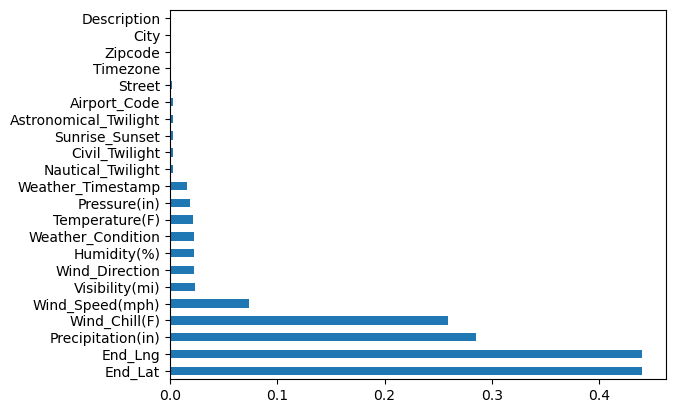

In [16]:
# view missing percentages as a graph, cleaned up to remove columns with no values
nullcolumn_percent[nullcolumn_percent != 0].plot(kind='barh')

Remove columns not of use

# Exploratory Analysis + Visualization
Columns to analyze:
1. City
2. Start Time
3. Start Lat, Start Lng
4. Temperature
5. Weather Condition

In [18]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### Column Analysis: City

In [19]:
df.City

0                Dayton
1          Reynoldsburg
2          Williamsburg
3                Dayton
4                Dayton
               ...     
7728389       Riverside
7728390       San Diego
7728391          Orange
7728392     Culver City
7728393        Highland
Name: City, Length: 7728394, dtype: object

In [21]:
# Check how many unique cities are in the data set
cities = df.City.unique()
len(cities)

13679

In [4]:
# Sort cities by their count as they appear in the dataset
cities_by_accident = df.City.value_counts()
cities_by_accident

Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: City, Length: 13678, dtype: int64

In [6]:
cities_by_accident[:20]

Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: City, dtype: int64

In [29]:
type(cities_by_accident)

pandas.core.series.Series

<Axes: >

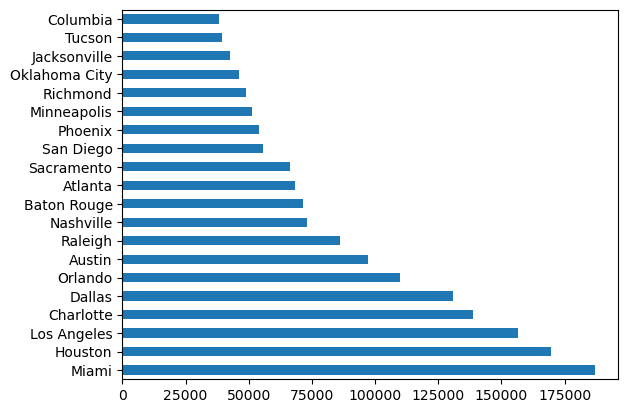

In [25]:
#plot data for cities with highest number of accidents
cities_by_accident[:20].plot(kind='barh')

In [23]:
# 'New York' in df.City
# 'Chicago' in df.City
# 'NY' in df.State
states_by_accident = df.State.value_counts()
states_by_accident[:50]
# Missing State: Alaska

CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
AZ     170609
GA     169234
IL     168958
TN     167388
MI     162191
LA     149701
NJ     140719
MD     140417
OH     118115
WA     108221
AL     101044
UT      97079
CO      90885
OK      83647
MO      77323
CT      71005
IN      67224
MA      61996
WI      34688
KY      32254
NE      28870
MT      28496
IA      26307
AR      22780
NV      21665
KS      20992
DC      18630
RI      16971
MS      15181
DE      14097
WV      13793
ID      11376
NM      10325
NH      10213
WY       3757
ND       3487
ME       2698
VT        926
SD        289
Name: State, dtype: int64

In [28]:
import seaborn as sns
sns.set_style('darkgrid')

<Axes: xlabel='City', ylabel='Count'>

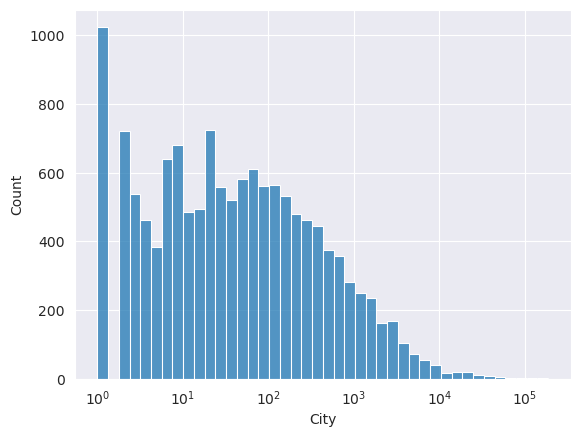

In [38]:
sns.histplot(cities_by_accident, log_scale = True)

In [32]:
high_accident_cities = cities_by_accident[ cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[ cities_by_accident < 1000]

In [35]:
len(high_accident_cities)/len (cities_by_accident)

0.08904810644831115

/tmp/ipykernel_32/2843252471.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(high_accident_cities)


<Axes: xlabel='City', ylabel='Density'>

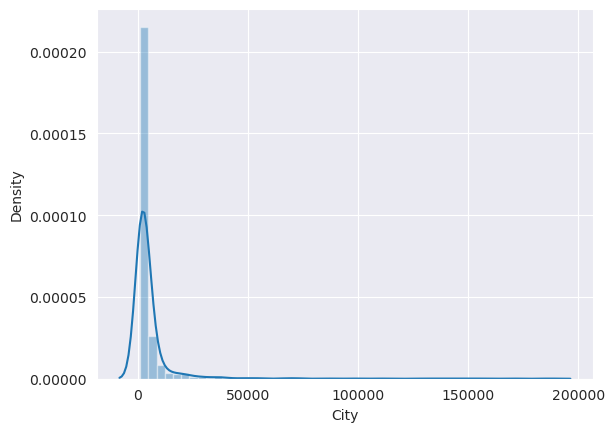

In [36]:
sns.distplot(high_accident_cities)

/tmp/ipykernel_32/469555131.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(low_accident_cities)


<Axes: xlabel='City', ylabel='Density'>

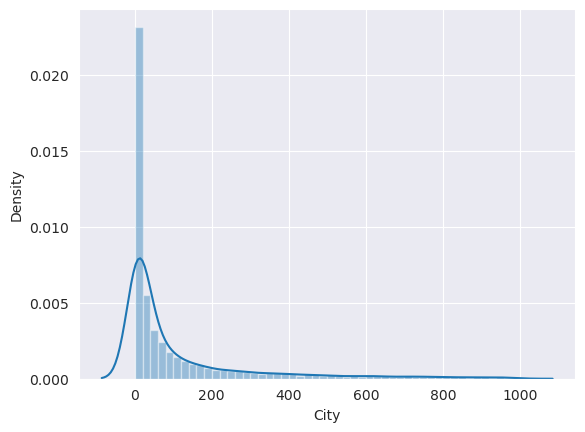

In [37]:
sns.distplot(low_accident_cities)

In [39]:
# Cities with 1 accident reported
cities_by_accident [cities_by_accident==1]

Lake Andes                      1
Catoctin                        1
Duck Hill                       1
Westbrookville                  1
Saint Croix                     1
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1023, dtype: int64

### Column Analysis: Start Time

In [40]:
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

In [42]:
df.Start_Time = pd.to_datetime(df.Start_Time)

/tmp/ipykernel_32/4273792631.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df.Start_Time.dt.hour, bins=24, kde=False, norm_hist = True )


<Axes: xlabel='Start_Time'>

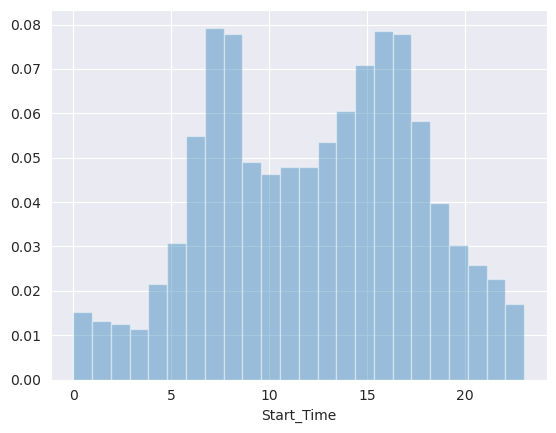

In [49]:
# Return hours of the day the accidents occurred in
# df.Start_Time.dt.hour

# Return histogram of above
sns.distplot( df.Start_Time.dt.hour, bins=24, kde=False, norm_hist = True )

Inferences:
- A high percentage of accidents occur between 7AM - 9AM, as well as between 4PM - 6PM, presumably due to working individuals driving to and from their place of employment

/tmp/ipykernel_32/3320206017.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist = True )


<Axes: xlabel='Start_Time'>

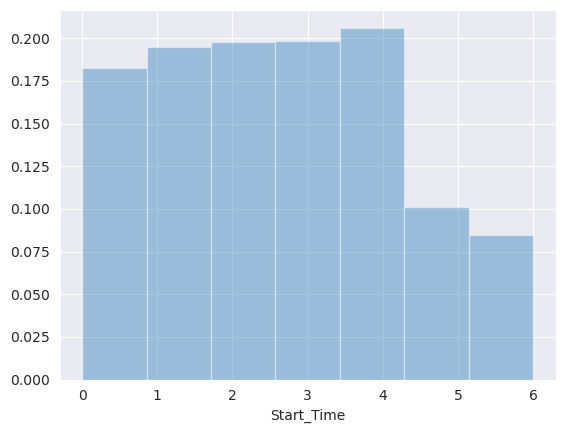

In [51]:
sns.distplot( df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist = True )

Inferences:
- Accident occurence is relatively distributed between weekdays,showing an increasing trend over the work week (Monday to Friday), with Friday having the highest number of accidents
- Accidents decrease significantly on Saturday and Sunday

Question: Is the hourly distribution of accidents the same on weekends as weekdays?

/tmp/ipykernel_32/3775131227.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sunday_start_time.dt.hour, bins=24, kde=False, norm_hist = True )


<Axes: xlabel='Start_Time'>

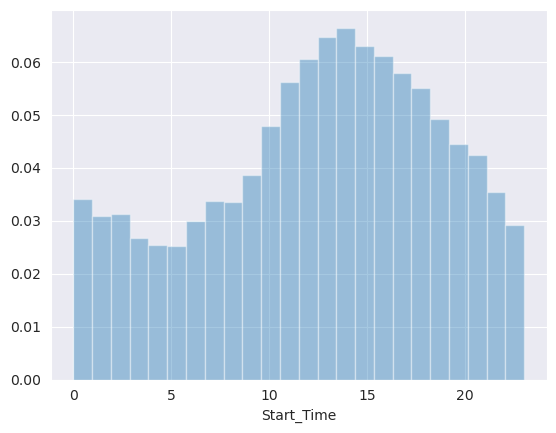

In [61]:
# Returns accidents occuring on Sunday(6) 
sunday_start_time = df.Start_Time [ df.Start_Time.dt.dayofweek == 6 ]
sns.distplot(sunday_start_time.dt.hour, bins=24, kde=False, norm_hist = True )

Inferences:
- On Sundays, the highest amount of accidents per hour occur between 12PM and 4PM, which differs drastically from weekdays (Monday's peak hourly accidents included below, which show a very different trend)

/tmp/ipykernel_32/1912618431.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist = True )


<Axes: xlabel='Start_Time'>

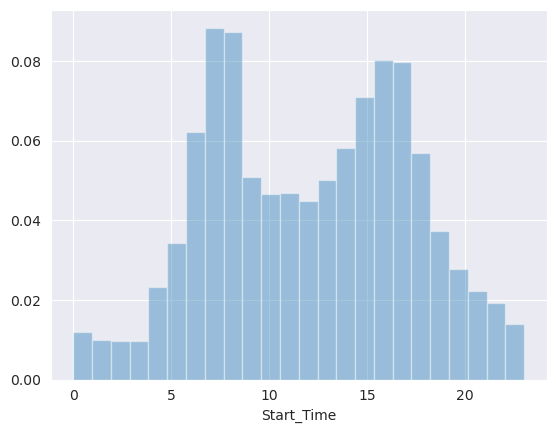

In [62]:
# Returns accidents occuring on Monday(0) 
monday_start_time = df.Start_Time [ df.Start_Time.dt.dayofweek == 0 ]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist = True )

/tmp/ipykernel_32/544609327.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2022.Start_Time.dt.month, bins=12, kde=False, norm_hist = True )


<Axes: xlabel='Start_Time'>

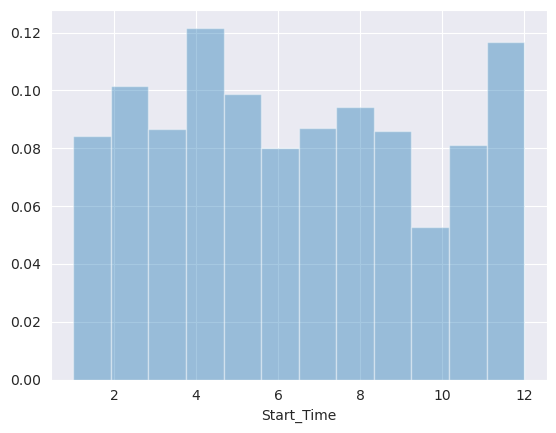

In [75]:
df_2022 = df[df.Start_Time.dt.year == 2022]
sns.distplot(df_2022.Start_Time.dt.month, bins=12, kde=False, norm_hist = True )

Inferences:
- From analyzing the dataset by month for all of the years for which data was captured for, it appears that accidents occur more towards the end and beginning of each year (November - January)
- Upon closer inspection of data by each year (2016-2023), it appears some significant data points by month are missing from the year the data was starting to be collected, as well as the year it was most recently updated (the set spans from February 2016 to March 2023, meaning any data within those two years outside of the specified months, was not included, which can result in anomalies in the overall monthly data for all of the years the data was recorded)

/tmp/ipykernel_32/63666214.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2022_S1.Start_Time.dt.month, bins=12, kde=False, norm_hist = True )
/tmp/ipykernel_32/63666214.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2022_S2.Start_Time.dt.month, bins=12, kde=False, norm_hist = Tru

<Axes: xlabel='Start_Time'>

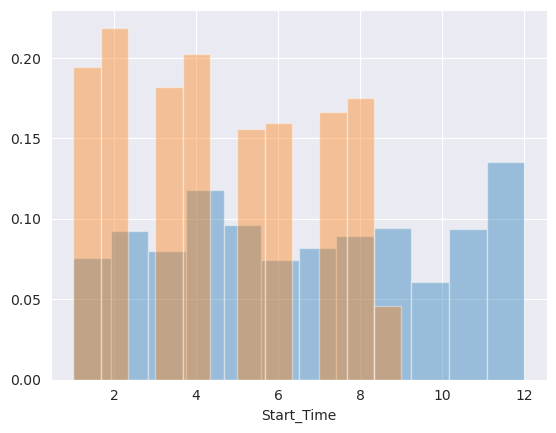

In [86]:
df_2022_S1 = df_2022 [df_2022.Source == 'Source1']
df_2022_S2 = df_2022 [df_2022.Source == 'Source2']
sns.distplot(df_2022_S1.Start_Time.dt.month, bins=12, kde=False, norm_hist = True )
sns.distplot(df_2022_S2.Start_Time.dt.month, bins=12, kde=False, norm_hist = True )

Inferences:
- Note that source 2 (Orange) seems to have discrepancies in its available data for a particular year (some Months are simply not available), while source 1 (Blue) has an even distribution of monthly accidents

<Axes: ylabel='Source'>

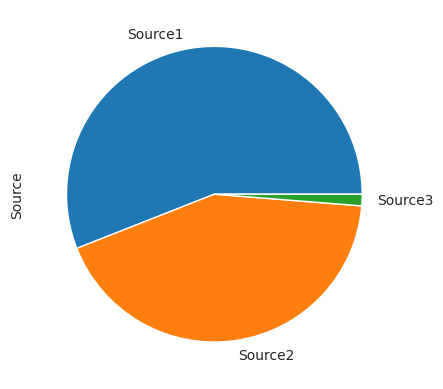

In [87]:
df.Source.value_counts().plot(kind='pie')

Consider excluding data from Source2, seems to have missing values / datapoints

### Column Analysis: Start Latitude, Longitude
Interactive Graphs

#### Scatter Plot (10% Sample)

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

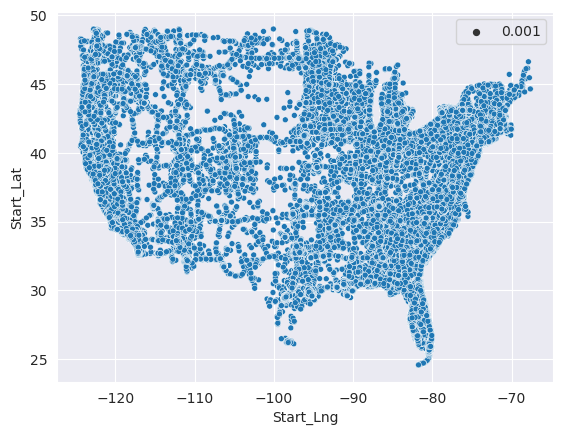

In [92]:
sample_df = df.sample( int(0.1* len(df)) )
sns.scatterplot( x=sample_df.Start_Lng, y=sample_df.Start_Lat, size = 0.001 )

#### Heat Map (1% Sample)

In [97]:
import folium
from folium.plugins import HeatMap

In [95]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]

In [113]:
sample_df = df.sample(int(0.001 * len(df)))
zipheat_data = zip (list(sample_df.Start_Lat), list(sample_df.Start_Lng))
lat_lon_pairs = list(zipheat_data)

In [114]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

# Analysis, Inferences & Conclusion

## Ask and Answer Questions
1. Are there more accidents in warmer or cooler areas?
2. Which 5 states have the highest number of accidents? How about per capita?
3. Do New York and Chicago show up in the data? If so, why are their counts lower if they are some of the most populated cities in the US?
4. Among the top 100 cities with the highest number of accidents, which states do they belong to? (i.e which states have the most number of cities with the highest amount of accidents)
5. What time of the day are accidents most prevalently occuring in?
6. Which days of the week have the most accidents?
7. Which months have the most accidents?
8. What is the trend of accidents every year? Decreasing or increasing?
9. When is accident per unit of traffic the highest?

## Conclusions

Insights:
 - No data for Alaska
 - Cities with some of the highest populations in US also don't have available data (eg New York City, Chicago)
 - The number of accidents per decreases exponentially
 - Almost 9% of cities with available data have more than 1000 annual accidents
 - Over 1000 cities have 1 reported accident (needs to be looked into)